`Done - Lowcarbon`

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
data = pd.read_stata("../../data/CDP Cleaning/cleaned outputs/cdp_lowcarbon.dta")

In [63]:
data.shape

(22930, 4)

In [77]:
data.head()

,id,year,cdp_lowcarbon_rev_total,cdp_lowcarbon_rev_total_missing
0,432,2016.0,0.000000,1
1,17657,2016.0,0.000000,0
2,1219,2016.0,0.000000,1
3,19174,2016.0,0.000000,1
4,3153,2016.0,3.103689,0


In [65]:
data.columns

Index(['id', 'year', 'cdp_lowcarbon_rev', 'cdp_lowcarbon_rev_total'], dtype='object')

In [66]:
# check that there are no duplicates
data[data.duplicated(subset=['id', 'year'])]

,id,year,cdp_lowcarbon_rev,cdp_lowcarbon_rev_total


In [67]:
data['cdp_lowcarbon_rev_total_missing'] = data['cdp_lowcarbon_rev_total'].isna().astype(int)
data['cdp_lowcarbon_rev_total'] = data['cdp_lowcarbon_rev_total'].replace(np.nan, 0)

In [68]:
data.sample(10)

,id,year,cdp_lowcarbon_rev,cdp_lowcarbon_rev_total,cdp_lowcarbon_rev_total_missing
12238,31514,2021.0,3.6,3.6,0
16381,51131,2022.0,NaN,0.0,1
2834,17322,2018.0,10.0,30.0,0
13691,842549,2021.0,NaN,0.0,1
17925,829528,2022.0,NaN,0.0,1
303,23228,2016.0,NaN,0.0,1
759,6559,2016.0,NaN,0.0,1
18586,15279,2022.0,94.0,94.0,0
9342,851231,2021.0,NaN,0.0,1
14613,8553,2022.0,NaN,0.0,1


In [69]:
data.corr()

,id,year,cdp_lowcarbon_rev,cdp_lowcarbon_rev_total,cdp_lowcarbon_rev_total_missing
id,1.000000,0.451979,0.038374,-0.190684,0.368710
year,0.451979,1.000000,-0.023785,-0.155870,0.254935
cdp_lowcarbon_rev,0.038374,-0.023785,1.000000,0.800539,NaN
cdp_lowcarbon_rev_total,-0.190684,-0.155870,0.800539,1.000000,-0.516621
cdp_lowcarbon_rev_total_missing,0.368710,0.254935,NaN,-0.516621,1.000000


Note that the correlation between lowcarbon_rev and lowcarbon_rev_total is very high at 0.8, so I will only keep total

In [70]:
data.drop(columns=['cdp_lowcarbon_rev'], inplace = True)

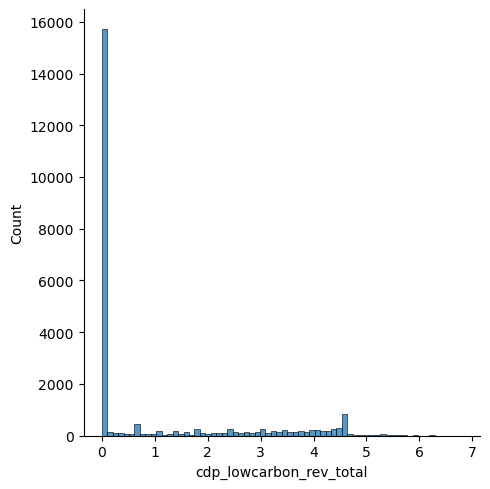

In [71]:
sns.displot(np.log1p(data.cdp_lowcarbon_rev_total))

In [72]:
# taking the log1p of lowcarbon rev total
data.cdp_lowcarbon_rev_total = np.log1p(data.cdp_lowcarbon_rev_total)

In [73]:
data.head()

,id,year,cdp_lowcarbon_rev_total,cdp_lowcarbon_rev_total_missing
0,432,2016.0,0.000000,1
1,17657,2016.0,0.000000,0
2,1219,2016.0,0.000000,1
3,19174,2016.0,0.000000,1
4,3153,2016.0,3.103689,0


In [74]:
data.isna().sum()

id                                 0
year                               0
cdp_lowcarbon_rev_total            0
cdp_lowcarbon_rev_total_missing    0
dtype: int64

In [75]:
data.shape

(22930, 4)

In [76]:
data.to_csv('../../data/processed/cdp_lowcarbon_processed.csv', index=False)